In [157]:
import sympy as sy
from sympy import *
from sympy.abc import x
from sympy.abc import y
from sympy.simplify.fu import TR8
from sympy import Matrix, print_latex
from IPython.display import Math, display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

n = 4

In [158]:
for i in range(1,n+1):
    a = sin(x)*(1+cos(x))**(n-i)*(1-cos(x))**(i-1)
    b = TR8(a.expand())
    display(Math(sy.latex(a) + ' = ' + sy.latex(b)))
    print_latex(b)

<IPython.core.display.Math object>

\frac{7 \sin{\left(x \right)}}{4} + \frac{7 \sin{\left(2 x \right)}}{4} + \frac{3 \sin{\left(3 x \right)}}{4} + \frac{\sin{\left(4 x \right)}}{8}


<IPython.core.display.Math object>

\frac{3 \sin{\left(x \right)}}{4} + \frac{\sin{\left(2 x \right)}}{4} - \frac{\sin{\left(3 x \right)}}{4} - \frac{\sin{\left(4 x \right)}}{8}


<IPython.core.display.Math object>

\frac{3 \sin{\left(x \right)}}{4} - \frac{\sin{\left(2 x \right)}}{4} - \frac{\sin{\left(3 x \right)}}{4} + \frac{\sin{\left(4 x \right)}}{8}


<IPython.core.display.Math object>

\frac{7 \sin{\left(x \right)}}{4} - \frac{7 \sin{\left(2 x \right)}}{4} + \frac{3 \sin{\left(3 x \right)}}{4} - \frac{\sin{\left(4 x \right)}}{8}


In [159]:
for i in range(1,n+1):
    a = sin(x)*(1+cos(x))**(n-i)*(1-cos(x))**(i-1)
    b = TR8(a.expand())
    c = sy.integrate(x*b,x)
    display(Math(sy.latex(c)))
    print_latex((x**1 *c.coeff(x, 1)).factor().expand())
    print_latex((c - x**1 * c.coeff(x, 1)).factor().expand())

<IPython.core.display.Math object>

- \frac{7 x \cos{\left(x \right)}}{4} - \frac{7 x \cos{\left(2 x \right)}}{8} - \frac{x \cos{\left(3 x \right)}}{4} - \frac{x \cos{\left(4 x \right)}}{32}
\frac{7 \sin{\left(x \right)}}{4} + \frac{7 \sin{\left(2 x \right)}}{16} + \frac{\sin{\left(3 x \right)}}{12} + \frac{\sin{\left(4 x \right)}}{128}


<IPython.core.display.Math object>

- \frac{3 x \cos{\left(x \right)}}{4} - \frac{x \cos{\left(2 x \right)}}{8} + \frac{x \cos{\left(3 x \right)}}{12} + \frac{x \cos{\left(4 x \right)}}{32}
\frac{3 \sin{\left(x \right)}}{4} + \frac{\sin{\left(2 x \right)}}{16} - \frac{\sin{\left(3 x \right)}}{36} - \frac{\sin{\left(4 x \right)}}{128}


<IPython.core.display.Math object>

- \frac{3 x \cos{\left(x \right)}}{4} + \frac{x \cos{\left(2 x \right)}}{8} + \frac{x \cos{\left(3 x \right)}}{12} - \frac{x \cos{\left(4 x \right)}}{32}
\frac{3 \sin{\left(x \right)}}{4} - \frac{\sin{\left(2 x \right)}}{16} - \frac{\sin{\left(3 x \right)}}{36} + \frac{\sin{\left(4 x \right)}}{128}


<IPython.core.display.Math object>

- \frac{7 x \cos{\left(x \right)}}{4} + \frac{7 x \cos{\left(2 x \right)}}{8} - \frac{x \cos{\left(3 x \right)}}{4} + \frac{x \cos{\left(4 x \right)}}{32}
\frac{7 \sin{\left(x \right)}}{4} - \frac{7 \sin{\left(2 x \right)}}{16} + \frac{\sin{\left(3 x \right)}}{12} - \frac{\sin{\left(4 x \right)}}{128}


In [162]:
def C(i,n = n):
    return i*math.comb(n,i)*2**(-n)
expected_values = []
for i in range(1,n+1):
    a = sin(x)*(1+cos(x))**(n-i)*(1-cos(x))**(i-1)
    b = TR8(a.expand())
    c = sy.integrate(x*b,x)
    d = c.subs(x,pi)-c.subs(x,0)
    display(Math(rf"C_{{{i}:{n}}}^{{-1}}\int_0^\pi xf_{{{i}:{n}}} dx\; = \;"+sy.latex(d)))
    print_latex(d)
    expected_values.append(d.evalf()* C(i,n))

<IPython.core.display.Math object>

\frac{35 \pi}{32}


<IPython.core.display.Math object>

\frac{55 \pi}{96}


<IPython.core.display.Math object>

\frac{73 \pi}{96}


<IPython.core.display.Math object>

\frac{93 \pi}{32}


In [163]:
for i in range(1,n+1):
    a = sin(x)*(1+cos(x))**(n-i)*(1-cos(x))**(i-1)
    b = TR8(a.expand())
    c = sy.integrate(x*b,x)
    d = ((c.subs(x,pi)-c.subs(x,0)) * i * math.comb(n,i) ).simplify()/2**n
    display(Math(rf"E X_{{{i}:{n}}} = "+sy.latex(d)))
    print_latex(d)

<IPython.core.display.Math object>

\frac{35 \pi}{128}


<IPython.core.display.Math object>

\frac{55 \pi}{128}


<IPython.core.display.Math object>

\frac{73 \pi}{128}


<IPython.core.display.Math object>

\frac{93 \pi}{128}


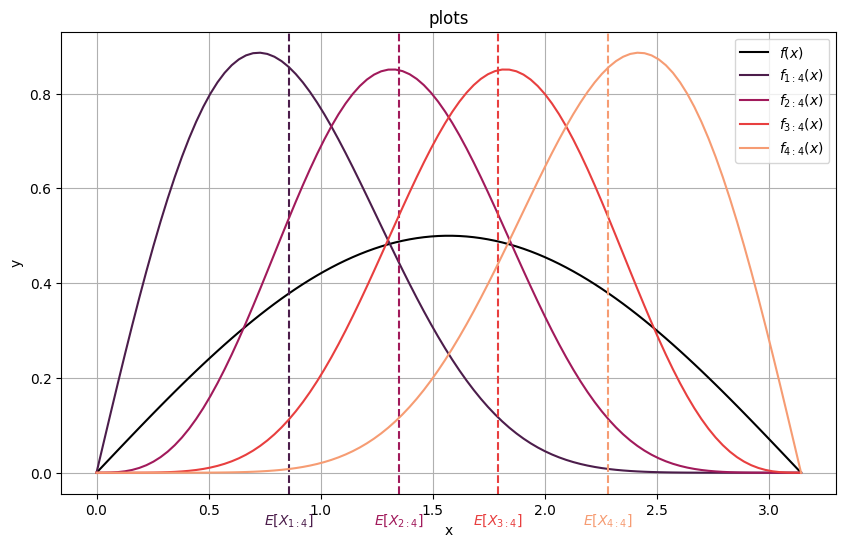

In [166]:
# Generate 5 colors from a color palette
colors = sns.color_palette("rocket",n_colors=4)

# Plot the functions
x_values = np.linspace(0, np.pi, 100)
plt.figure(figsize=(10, 6))

def f(x):
    return np.sin(x)/2
y_f = f(x_values)
plt.plot(x_values, y_f, label=r'$f(x)$', color="black")

def C(i,n = n):
    return i*math.comb(n,i)*2**(-n)

for i in range(1,5):
    def fi(x):
        return c(i,n) * np.sin(x)*(1+np.cos(x))**(n-i)*(1-np.cos(x))**(i-1)
    y = fi(x_values)
    plt.plot(x_values, y, label=rf"$f_{{{i}:{n}}}(x) $", color=colors[i-1])
    plt.axvline(x=expected_values[i-1], color=colors[i-1], linestyle='--')
    plt.text(expected_values[i-1], -0.1, rf"$E[X_{{{i}:{n}}}]$", ha='center', va='center', color=colors[i-1] )

plt.xlabel('x')
plt.ylabel('y')
plt.title('plots')
plt.legend()
plt.grid(True)
plt.savefig("1b")
plt.show()
